In [59]:
import pandas as pd
data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [60]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [61]:
for col in data:
    print("========================"+col+"=======================")
    print(data[col].unique())
    print("\n\n")

========================Age=======================
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]



========================Sex=======================
['M' 'F']



========================ChestPainType=======================
['ATA' 'NAP' 'ASY' 'TA']



========================RestingBP=======================
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]



========================Cholesterol=======================
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265

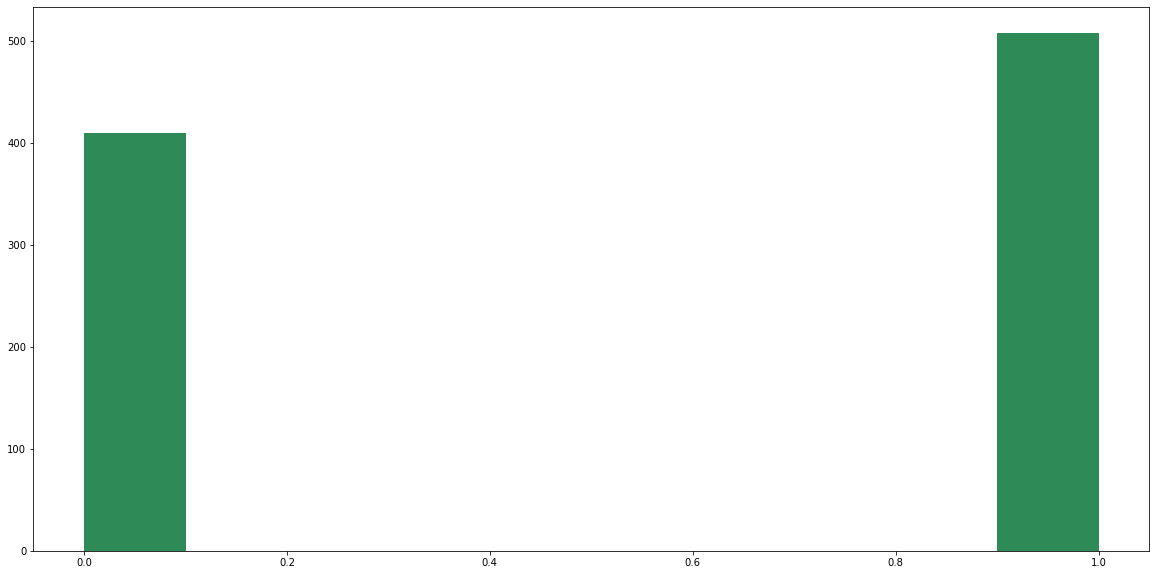

In [62]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,10))
plt.hist(data["HeartDisease"], color='seagreen')
plt.show()

In [63]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder()
data['Sex'] = labelencoder.fit_transform(data['Sex'])

In [64]:
data['ChestPainType'] = labelencoder.fit_transform(data['ChestPainType'])
data['RestingECG'] = labelencoder.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = labelencoder.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = labelencoder.fit_transform(data['ST_Slope'])

In [65]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [66]:
target_data = data["HeartDisease"]
data = data.drop(['HeartDisease'],axis=1)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [67]:
type(target_data)

pandas.core.series.Series

In [68]:
from sklearn.preprocessing import MinMaxScaler
normalization = MinMaxScaler()
data = normalization.fit_transform(data)

In [95]:
data[5:10]

array([[0.2244898 , 1.        , 0.66666667, 0.6       , 0.56218905,
        0.        , 0.5       , 0.77464789, 0.        , 0.29545455,
        1.        ],
       [0.34693878, 0.        , 0.33333333, 0.65      , 0.39303483,
        0.        , 0.5       , 0.77464789, 0.        , 0.29545455,
        1.        ],
       [0.53061224, 1.        , 0.33333333, 0.55      , 0.34494196,
        0.        , 0.5       , 0.57746479, 0.        , 0.29545455,
        1.        ],
       [0.18367347, 1.        , 0.        , 0.7       , 0.34328358,
        0.        , 0.5       , 0.49295775, 1.        , 0.46590909,
        0.5       ],
       [0.40816327, 0.        , 0.33333333, 0.6       , 0.47097844,
        0.        , 0.5       , 0.42253521, 0.        , 0.29545455,
        1.        ]])

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target_data.to_numpy(), test_size=0.23, shuffle=True, random_state=42)

In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [71]:
model.fit(X_train,y_train)

C:\Users\Rahu16\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
print(model.score(X_train,y_train))

0.8597733711048159


In [73]:
score = model.score(X_test,y_test)
print(score)

0.8537735849056604


In [74]:
from sklearn.linear_model import SGDClassifier
model2 = SGDClassifier(alpha = 0.0009, loss='log',max_iter=7000)

In [75]:
model2.fit(X_train,y_train)

SGDClassifier(alpha=0.0009, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=7000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [76]:
print(model2.score(X_train,y_train))

0.8555240793201133


In [77]:
score = model2.score(X_test,y_test)
print(score)

0.839622641509434


In [88]:
model3 = SGDClassifier(alpha = 0.003, loss='log',max_iter=5000)
model3.fit(X_train,y_train)
print(model3.score(X_train,y_train))

0.8555240793201133


In [89]:
score = model3.score(X_test,y_test)
print(score)

0.8537735849056604


In [90]:
from sklearn import metrics
predictions = model3.predict(X_test)
cf_matrix = metrics.confusion_matrix(y_test, predictions)

C:\Users\Rahu16\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


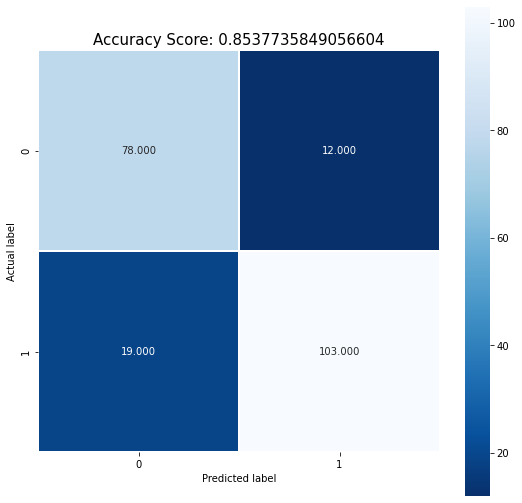

In [91]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [92]:
print(predictions)

[0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1
 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1
 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1
 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0]


# Manual Testing

In [ ]:
inputs=[]
inputs[0] = int(input("Enter Age : "))
inputs[1] = input("Enter Gender(Male/Female) : ")
inputs[2] = input("Enter ChestPainType(ATA/NAP/ASY/TA) : ")
inputs[3] = int(input("Enter Resting BP : "))
inputs[4] = int(input("Enter Cholesterol Level : "))
inputs[5] = int(input("Enter FastingBS : "))
inputs[6] = input("Enter Resting ECG(Normal/ST/LVH) : ")
inputs[7] = int(input("Enter MaxHR : "))
inputs[8] = input("Enter ExerciseAngina(N/Y) : ")
inputs[9] = float(input("Enter Oldpeak : "))
inputs[10]= input("Enter ST_Slope(Up/Flat/Down) : ")